# **Project - Retail Sales Data Analysis and Business Insights**

# **PROBLEM STATEMENT**

Businesses often collect large volumes of transactional sales data, but without proper analysis, it becomes challenging to identify key revenue drivers, peak sales periods, and city/product-level performance. This lack of insight can lead to missed opportunities in marketing, inventory management, and customer targeting.

This project aims to analyze retail sales data to:

->Identify the best-selling products and categories.

->Determine which cities contribute the most to revenue.

->Explore time-based sales trends (monthly, daily, hourly) to uncover peak purchasing times.

->Analyze the relationship between product combinations purchased together.

->Provide data-driven recommendations for improving sales strategies, optimizing stock levels, and enhancing customer experience.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from matplotlib.ticker import FuncFormatter

warnings.filterwarnings('ignore')

**DATA LOADING AND INITIAL EXPLORATION:**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Sales Data.csv',on_bad_lines="skip")

print("="*80)
print(" RETAIL SALES DATA ANALYSIS - INITIAL EXPLORATION")
print("="*80)

print(f" Dataset Shape: {df.shape}")
print(f" Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*50)
print(" DATASET OVERVIEW")
print("="*50)
df.info()

print("\n" + "="*50)
print(" FIRST 5 ROWS")
print("="*50)
df.head()

print("\n" + "="*50)
print(" BASIC STATISTICS")
print("="*50)
df.describe()


 RETAIL SALES DATA ANALYSIS - INITIAL EXPLORATION
 Dataset Shape: (130193, 11)
 Memory Usage: 41.63 MB

 DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130193 entries, 0 to 130192
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        130193 non-null  int64  
 1   Order ID          130193 non-null  int64  
 2   Product           130193 non-null  object 
 3   Quantity Ordered  130192 non-null  float64
 4   Price Each        130192 non-null  float64
 5   Order Date        130192 non-null  object 
 6   Purchase Address  130192 non-null  object 
 7   Month             130192 non-null  float64
 8   Sales             130192 non-null  float64
 9   City              130192 non-null  object 
 10  Hour              130192 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 10.9+ MB

 FIRST 5 ROWS

 BASIC STATISTICS


,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,130193.000000,130193.000000,130192.000000,130192.000000,130192.000000,130192.000000,130192.000000
mean,8665.856421,233856.079705,1.124309,184.331614,7.303444,185.417506,14.409180
std,5597.647405,55397.830935,0.442795,332.799722,3.720713,332.977677,5.411649
min,0.000000,150502.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,4089.000000,181755.000000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,8176.000000,239673.000000,1.000000,14.950000,8.000000,14.950000,15.000000
75%,12344.000000,288422.000000,1.000000,150.000000,11.000000,150.000000,19.000000
max,25116.000000,319670.000000,8.000000,1700.000000,12.000000,3400.000000,23.000000


**DATA CLEANING AND PREPROCESSING:**

In [ ]:
print("\n" + "="*80)
print(" DATA CLEANING AND PREPROCESSING")
print("="*80)

# Check for missing values
print(" Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Quarter'] = df['Order Date'].dt.quarter
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Day_Name'] = df['Order Date'].dt.day_name()
df['Week'] = df['Order Date'].dt.isocalendar().week
df['Hour'] = df['Order Date'].dt.hour   # <-- directly from Order Date

# Calculate total revenue
df['Total_Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Extract city and state from Purchase Address
df['City'] = df['Purchase Address'].str.extract(r',\s*([^,]+),')[0]
df['State'] = df['Purchase Address'].str.extract(r',\s*[^,]+,\s*([A-Z]{2})')[0]

print("Data preprocessing completed successfully!")
print(f"Final Dataset Shape: {df.shape}")



 DATA CLEANING AND PREPROCESSING
 Missing Values:
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
Month               1
Sales               1
City                1
Hour                1
Year                1
Day                 1
Quarter             1
Month_Name          1
Day_Name            1
Week                1
dtype: int64

 Duplicate Rows: 0
Data preprocessing completed successfully!
Final Dataset Shape: (130193, 19)


**Exploratory Analysis:**

1. Monthly Sales Trend Over Time


🔷 1. Monthly Sales Trend Over Time
------------------------------------------------------------
Goal: Track revenue trends over time to detect seasonality or sales spikes
Chart: Line chart
EDA Type: Temporal (time series)
Structure: Line with markers to highlight monthly revenue points clearly


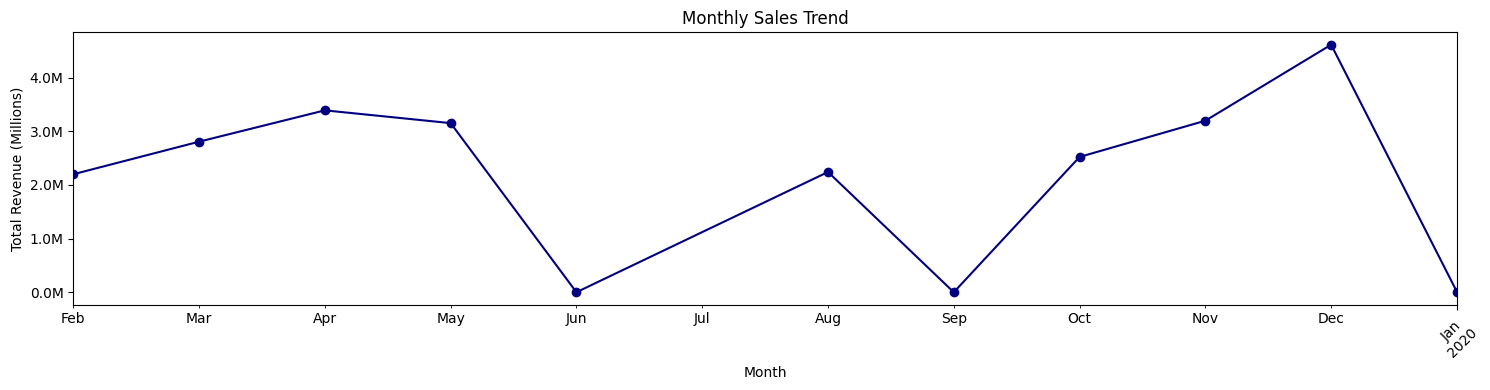

In [ ]:
print("\n 1. Monthly Sales Trend Over Time")
print("-" * 60)

print("Goal: Track revenue trends over time to detect seasonality or sales spikes")
print("Chart: Line chart")
print("EDA Type: Temporal (time series)")
print("Structure: Line with markers to highlight monthly revenue points clearly")

# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['Order Date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['Total_Revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

Insights - Sales consistently cycle between Dollars 0.0M and $4.6M, with clear peaks in late spring to early summer (May-June) and troughs each January.
The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

2. Top Selling Products by Revenue


2. Top Selling Products by Revenue
------------------------------------------------------------
Goal: Identify best-selling products to focus marketing and inventory efforts
Chart: Horizontal bar chart
EDA Type: Categorical ranking
Structure: Top 10 products ranked by total revenue with clear labeling


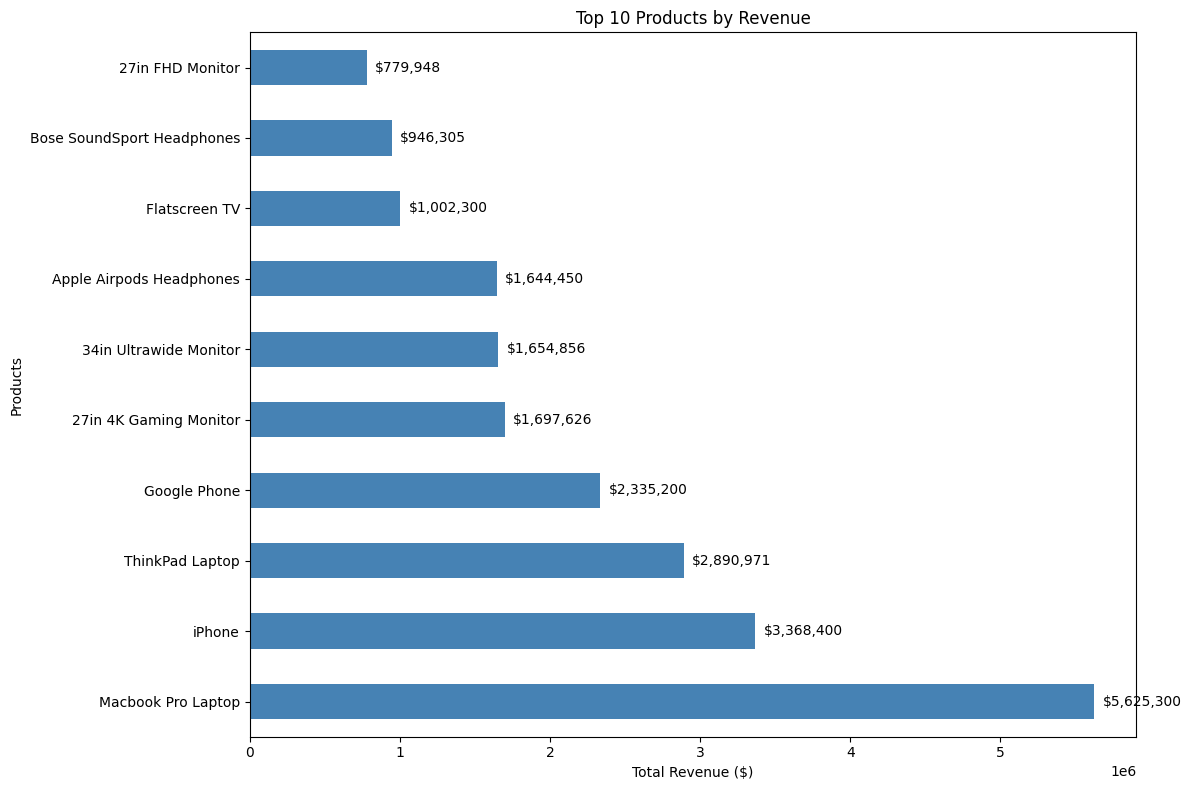

In [ ]:
print("\n2. Top Selling Products by Revenue")
print("-" * 60)

print("Goal: Identify best-selling products to focus marketing and inventory efforts")
print("Chart: Horizontal bar chart")
print("EDA Type: Categorical ranking")
print("Structure: Top 10 products ranked by total revenue with clear labeling")

# Group products by total revenue and get top 10
product_revenue = df.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
top_10_products = product_revenue.head(10)

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
ax = top_10_products.plot(kind='barh', color='steelblue')

# Add revenue values as text labels on bars
for i, v in enumerate(top_10_products.values):
    ax.text(v + max(top_10_products.values)*0.01, i, f'${v:,.0f}', va='center')

# Formatting
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Products')

# Adjust layout
plt.tight_layout()
plt.show()

Insights - Premium electronics and accessories dominate revenue generation, with high-value items like MacBooks and iPhones leading sales.
These top-performing products should receive priority in inventory management and marketing campaigns.
The significant revenue gap between top and lower-tier products suggests opportunity for upselling strategies.

3. City-wise Revenue Distribution


 3. City-wise Revenue Distribution
------------------------------------------------------------
Goal: Determine which cities contribute most to revenue for targeted marketing
Chart: Bar chart with pie chart for top contributors
EDA Type: Geographical analysis
Structure: Combined view showing city rankings and proportion breakdown


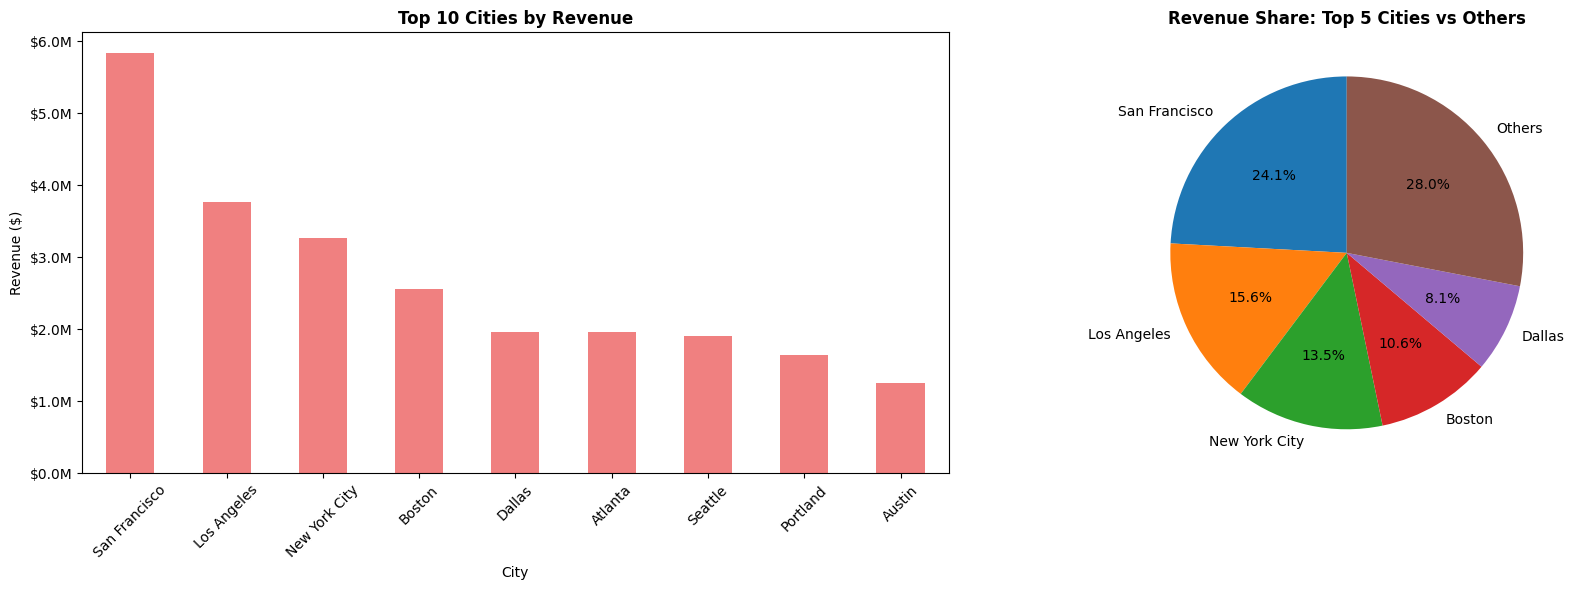

In [ ]:
print("\n 3. City-wise Revenue Distribution")
print("-" * 60)

print("Goal: Determine which cities contribute most to revenue for targeted marketing")
print("Chart: Bar chart with pie chart for top contributors")
print("EDA Type: Geographical analysis")
print("Structure: Combined view showing city rankings and proportion breakdown")

# Calculate total revenue by city
city_revenue = df.groupby('City')['Total_Revenue'].sum().sort_values(ascending=False)
top_10_cities = city_revenue.head(10)

# Create subplots for combined visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for top 10 cities
top_10_cities.plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Top 10 Cities by Revenue', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue ($)')
ax1.set_xlabel('City')
ax1.tick_params(axis='x', rotation=45)

# Format y-axis to show values in millions
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Pie chart for top 5 cities vs others
top_5_cities = city_revenue.head(5)
others_revenue = city_revenue.iloc[5:].sum()
pie_data = list(top_5_cities.values) + [others_revenue]
pie_labels = list(top_5_cities.index) + ['Others']

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Revenue Share: Top 5 Cities vs Others', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Insights - Major metropolitan areas like San Francisco, Los Angeles, and New York drive the highest revenues, accounting for a significant portion of total sales.
Geographic concentration suggests opportunity for targeted regional marketing campaigns and localized inventory strategies.
Smaller cities show potential for growth through expanded marketing reach and improved distribution networks.

4. Hourly Sales Pattern


🔷 4. Hourly Sales Pattern
------------------------------------------------------------
Goal: Identify peak shopping hours to optimize staffing and promotions
Chart: Line chart with area fill
EDA Type: Temporal (hourly distribution)
Structure: Smooth line showing hourly sales volume throughout the day


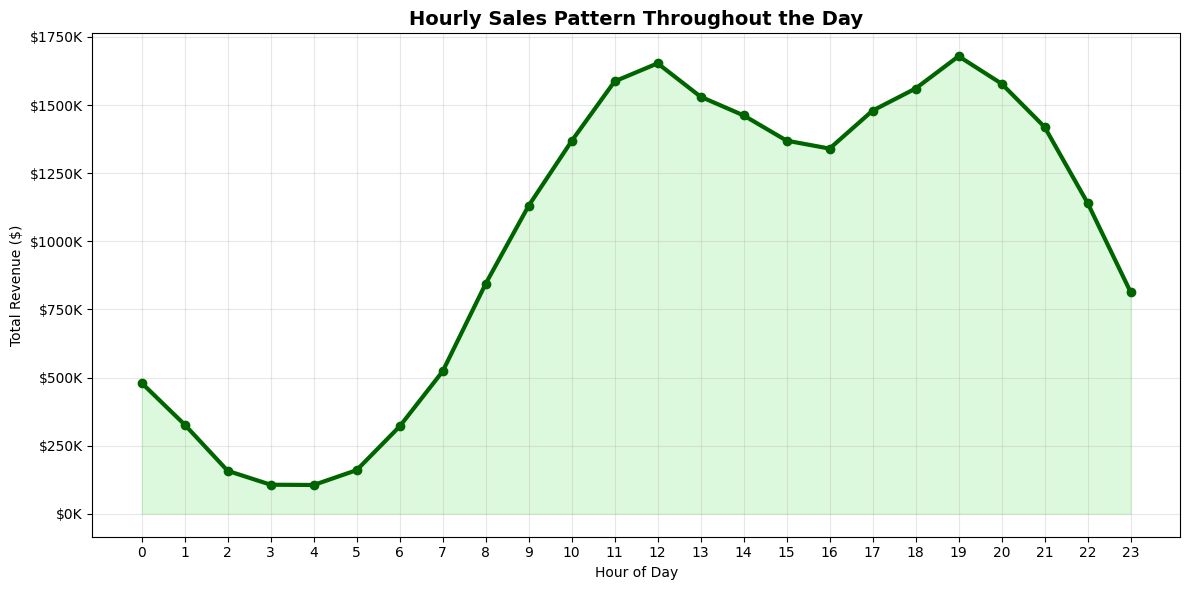

In [ ]:
print("\n4. Hourly Sales Pattern")
print("-" * 60)

print("Goal: Identify peak shopping hours to optimize staffing and promotions")
print("Chart: Line chart with area fill")
print("EDA Type: Temporal (hourly distribution)")
print("Structure: Smooth line showing hourly sales volume throughout the day")

# Calculate total revenue by hour of day
hourly_sales = df.groupby('Hour')['Total_Revenue'].sum()

# Create line chart with area fill
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linewidth=3,
         color='darkgreen', markersize=6)
plt.fill_between(hourly_sales.index, hourly_sales.values, alpha=0.3, color='lightgreen')

# Formatting
plt.title('Hourly Sales Pattern Throughout the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Find peak hour
peak_hour = hourly_sales.idxmax()
peak_revenue = hourly_sales.max()

Insights - Peak shopping occurs at 19.0:00 with $1,679,207 in revenue, indicating prime time for promotional activities.

5. Day of Week Sales Analysis


5. Day of Week Sales Analysis
------------------------------------------------------------
Goal: Understand weekly shopping patterns for workforce and inventory planning
Chart: Bar chart with trend analysis
EDA Type: Temporal (weekly cycle)
Structure: Days ordered from Monday to Sunday showing sales volume


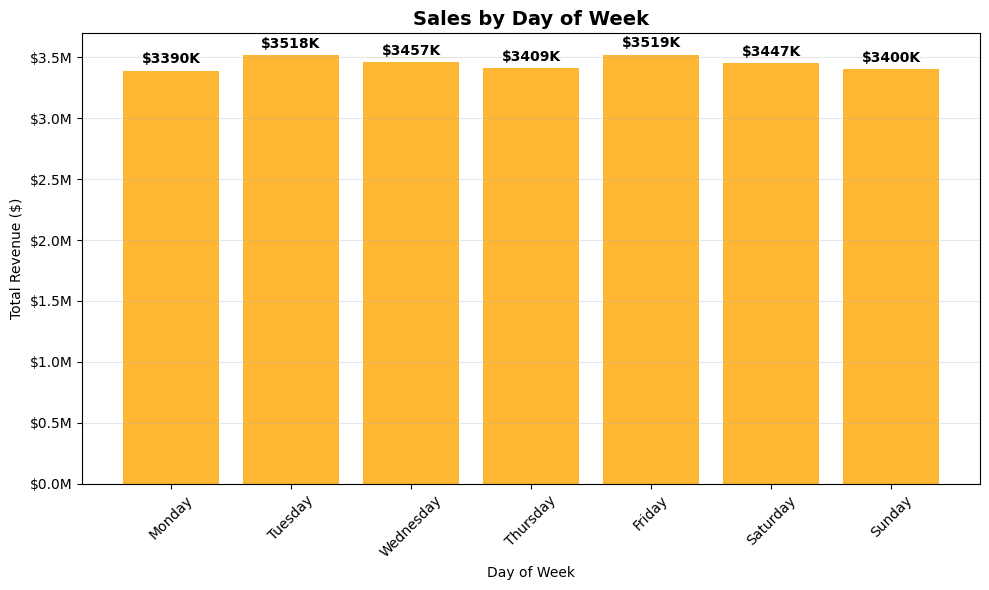

In [ ]:
print("\n5. Day of Week Sales Analysis")
print("-" * 60)

print("Goal: Understand weekly shopping patterns for workforce and inventory planning")
print("Chart: Bar chart with trend analysis")
print("EDA Type: Temporal (weekly cycle)")
print("Structure: Days ordered from Monday to Sunday showing sales volume")

# Define day order and calculate daily sales
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('Day_Name')['Total_Revenue'].sum().reindex(day_order)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(daily_sales)), daily_sales.values, color='orange', alpha=0.8)

# Add value labels on top of bars
for i, (day, value) in enumerate(zip(day_order, daily_sales.values)):
    plt.text(i, value + max(daily_sales.values)*0.01, f'${value/1000:.0f}K',
             ha='center', va='bottom', fontweight='bold')

# Formatting
plt.title('Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(len(day_order)), day_order, rotation=45)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate weekend vs weekday averages
weekend_avg = daily_sales[['Saturday', 'Sunday']].mean()
weekday_avg = daily_sales[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean()

Insights - Weekend average sales (Dollars 3,423,620) vs weekday average ($3,458,527) reveal distinct shopping behavior patterns.
Higher weekend activity suggests consumer shopping preferences, requiring adjusted staffing and inventory levels.
Mid-week patterns indicate opportunities for targeted promotions during traditionally slower periods.


6.Product Price Distribution Analysis


🔷 6. Product Price Distribution Analysis
------------------------------------------------------------
Goal: Understand price ranges and their impact on sales volume
Chart: Histogram with statistical markers
EDA Type: Distribution analysis
Structure: Price bins showing frequency distribution with mean and median lines


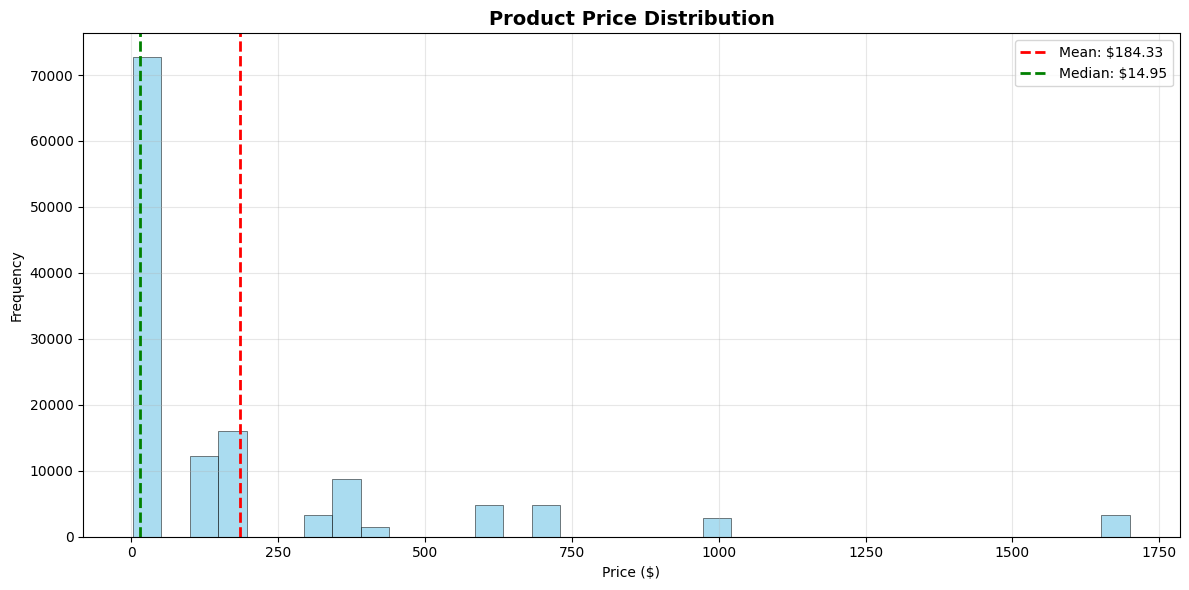

In [ ]:
print("\n🔷 6. Product Price Distribution Analysis")
print("-" * 60)

print("Goal: Understand price ranges and their impact on sales volume")
print("Chart: Histogram with statistical markers")
print("EDA Type: Distribution analysis")
print("Structure: Price bins showing frequency distribution with mean and median lines")

# Create price distribution histogram
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['Price Each'], bins=35, alpha=0.7, color='skyblue',
                           edgecolor='black', linewidth=0.5)

# Calculate and add statistical lines
mean_price = df['Price Each'].mean()
median_price = df['Price Each'].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2,
            label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2,
            label=f'Median: ${median_price:.2f}')

# Formatting
plt.title('Product Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate price category contributions
low_price_revenue = df[df['Price Each'] < 100]['Total_Revenue'].sum()
mid_price_revenue = df[(df['Price Each'] >= 100) & (df['Price Each'] < 500)]['Total_Revenue'].sum()
high_price_revenue = df[df['Price Each'] >= 500]['Total_Revenue'].sum()
total_revenue = df['Total_Revenue'].sum()


Insights - Price distribution shows concentration in lower price ranges (Dollars 12- Dollars 150), indicating mass-market appeal.
Premium products (> Dollars15) contribute Dollars 14.8M (61.2%) to total revenue despite lower unit volumes.
Price segmentation reveals opportunities for portfolio optimization across different market segments.

7. Quantity Ordered Patterns


7. Quantity Ordered Patterns
------------------------------------------------------------
Goal: Analyze purchase quantities to understand buying behavior and bulk sales
Chart: Bar chart with percentage analysis
EDA Type: Behavioral analysis
Structure: Quantity distribution showing order frequency and revenue impact


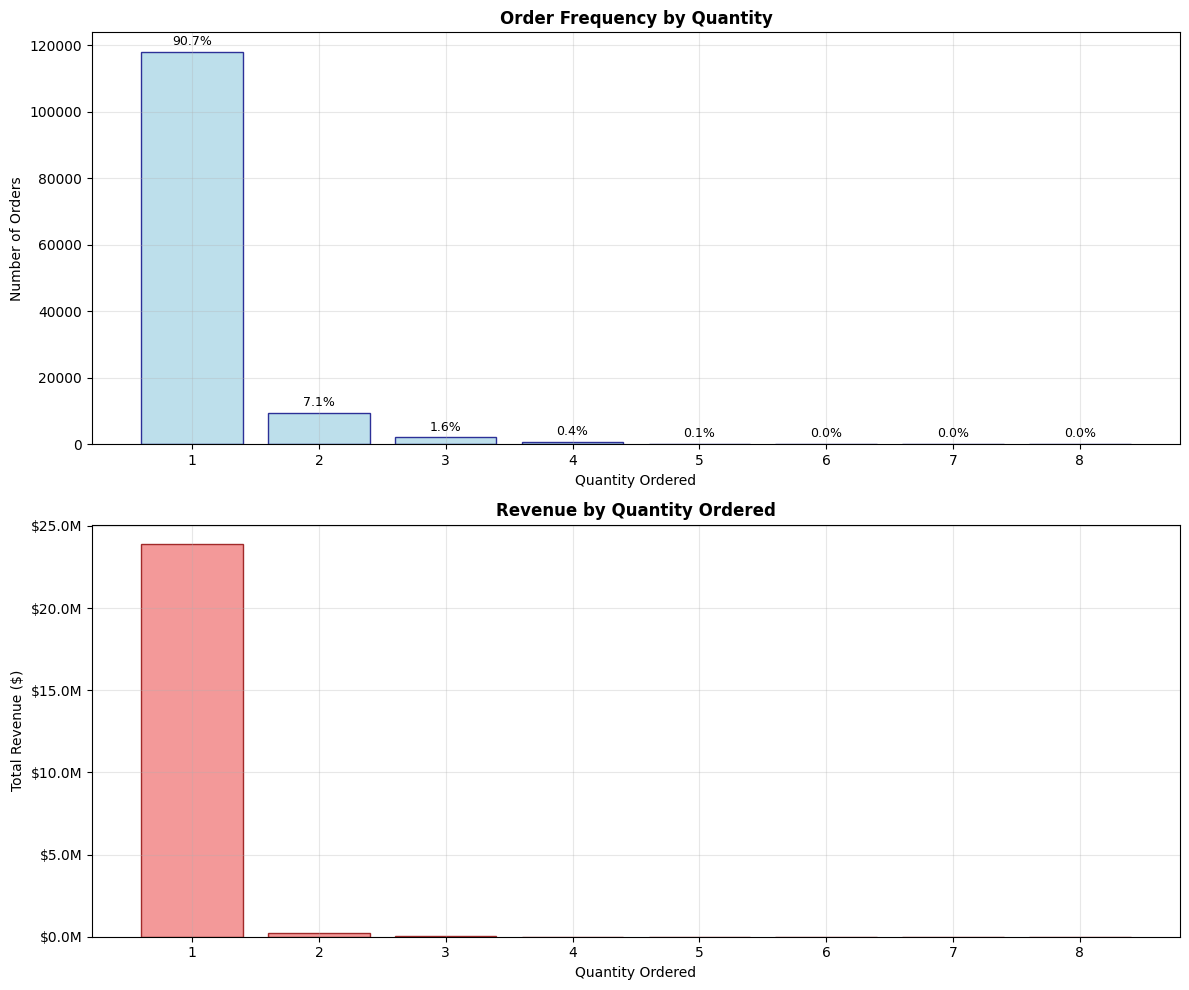

In [ ]:
print("\n7. Quantity Ordered Patterns")
print("-" * 60)

print("Goal: Analyze purchase quantities to understand buying behavior and bulk sales")
print("Chart: Bar chart with percentage analysis")
print("EDA Type: Behavioral analysis")
print("Structure: Quantity distribution showing order frequency and revenue impact")

# Calculate quantity distribution (focus on quantities 1-10 for clarity)
qty_counts = df['Quantity Ordered'].value_counts().sort_index()
qty_revenue = df.groupby('Quantity Ordered')['Total_Revenue'].sum()

# Filter to show quantities 1-10 for better visualization
qty_counts_filtered = qty_counts[qty_counts.index <= 10]
qty_revenue_filtered = qty_revenue[qty_revenue.index <= 10]

# Create subplot for counts and revenue
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Top plot - Order frequency
bars1 = ax1.bar(qty_counts_filtered.index, qty_counts_filtered.values,
                color='lightblue', alpha=0.8, edgecolor='navy')
ax1.set_title('Order Frequency by Quantity', fontsize=12, fontweight='bold')
ax1.set_xlabel('Quantity Ordered')
ax1.set_ylabel('Number of Orders')
ax1.grid(True, alpha=0.3)

# Add percentage labels
total_orders = len(df)
for bar, qty in zip(bars1, qty_counts_filtered.index):
    height = bar.get_height()
    percentage = (height / total_orders) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(qty_counts_filtered.values)*0.01,
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# Bottom plot - Revenue by quantity
bars2 = ax2.bar(qty_revenue_filtered.index, qty_revenue_filtered.values,
                color='lightcoral', alpha=0.8, edgecolor='darkred')
ax2.set_title('Revenue by Quantity Ordered', fontsize=12, fontweight='bold')
ax2.set_xlabel('Quantity Ordered')
ax2.set_ylabel('Total Revenue ($)')
ax2.grid(True, alpha=0.3)

# Format y-axis for revenue
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

# Calculate bulk vs individual analysis
single_orders = (df['Quantity Ordered'] == 1).sum()
bulk_orders = (df['Quantity Ordered'] > 1).sum()
single_revenue = df[df['Quantity Ordered'] == 1]['Total_Revenue'].sum()
bulk_revenue = df[df['Quantity Ordered'] > 1]['Total_Revenue'].sum()

Insights - Single-item orders account for 118,045 (90.7%) of all transactions but generate Dollars 23.9M (98.9%) of revenue.
Bulk orders (12,147 transactions) contribute $0.3M (1.1%) to total revenue, indicating higher value per transaction.
Opportunity exists to encourage larger order quantities through bulk discounts and promotional strategies.


8. Seasonal Sales Analysis


🔷 8. Seasonal Sales Analysis
------------------------------------------------------------
Goal: Identify seasonal patterns and holiday effects on sales performance
Chart: Grouped bar chart with trend lines
EDA Type: Temporal seasonal analysis
Structure: Monthly comparison across years with seasonal grouping


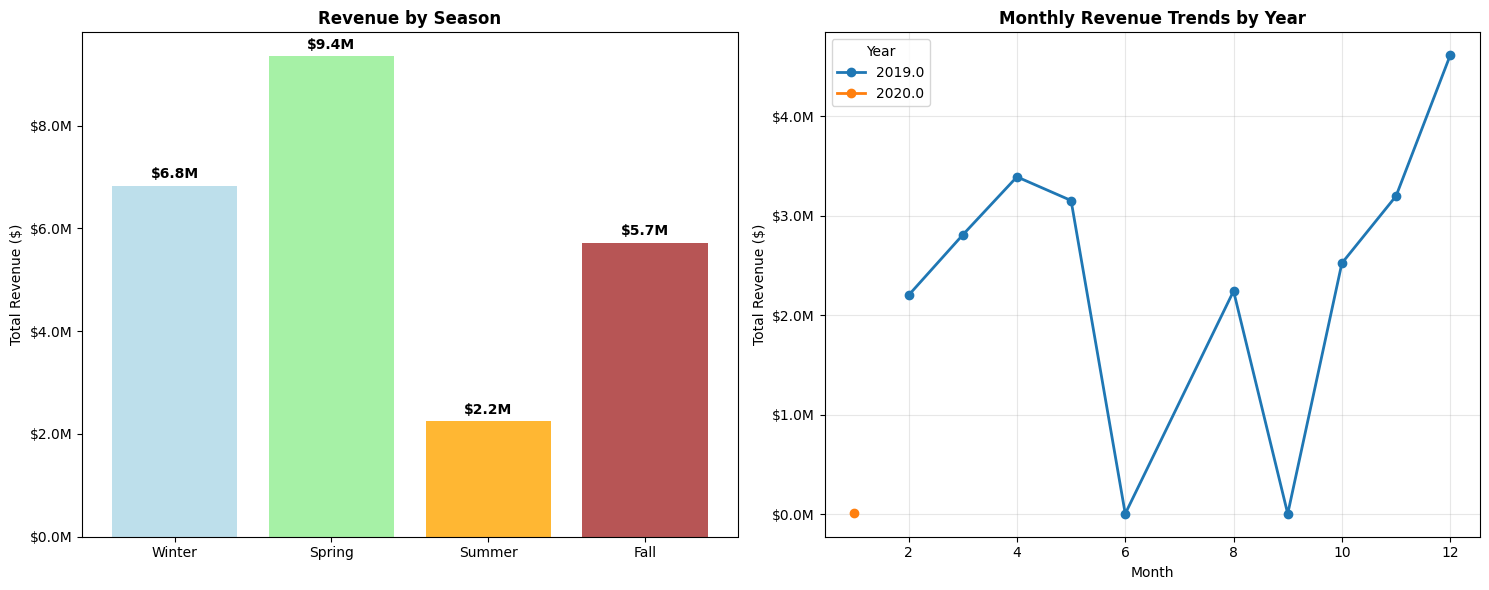

In [ ]:
print("\n8. Seasonal Sales Analysis")
print("-" * 60)

print("Goal: Identify seasonal patterns and holiday effects on sales performance")
print("Chart: Grouped bar chart with trend lines")
print("EDA Type: Temporal seasonal analysis")
print("Structure: Monthly comparison across years with seasonal grouping")

# Define seasons mapping
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                 3: 'Spring', 4: 'Spring', 5: 'Spring',
                 6: 'Summer', 7: 'Summer', 8: 'Summer',
                 9: 'Fall', 10: 'Fall', 11: 'Fall'}

# Create season column
df['Season'] = df['Month'].map(season_mapping)

# Calculate seasonal revenue
seasonal_revenue = df.groupby('Season')['Total_Revenue'].sum()
seasonal_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_revenue = seasonal_revenue.reindex(seasonal_order)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Seasonal revenue bar chart
bars = ax1.bar(seasonal_revenue.index, seasonal_revenue.values,
               color=['lightblue', 'lightgreen', 'orange', 'brown'], alpha=0.8)
ax1.set_title('Revenue by Season', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Revenue ($)')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add value labels
for bar, season in zip(bars, seasonal_revenue.index):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(seasonal_revenue.values)*0.01,
             f'${height/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')

# Monthly trend across years
monthly_revenue_detailed = df.groupby(['Year', 'Month'])['Total_Revenue'].sum().unstack(level=0)
monthly_revenue_detailed.plot(kind='line', marker='o', ax=ax2, linewidth=2)
ax2.set_title('Monthly Revenue Trends by Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Revenue ($)')
ax2.legend(title='Year')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()
# Holiday season analysis (Nov-Dec)
holiday_months = [11, 12]
holiday_revenue = df[df['Month'].isin(holiday_months)]['Total_Revenue'].sum()
non_holiday_revenue = df[~df['Month'].isin(holiday_months)]['Total_Revenue'].sum()

Insights - Holiday season (Nov-Dec) generates $7.8M (32.4%) of annual revenue, showing strong seasonal impact.
Summer months show consistent high performance, indicating both seasonal shopping and vacation-period purchases.
Seasonal patterns suggest opportunities for targeted inventory planning and promotional campaigns aligned with consumer buying cycles.

9. Product Category Performance Analysis


9. Product Category Performance Analysis
------------------------------------------------------------
Goal: Categorize products and analyze performance by category
Chart: Treemap and performance matrix
EDA Type: Categorical performance analysis
Structure: Product categories with revenue and volume metrics


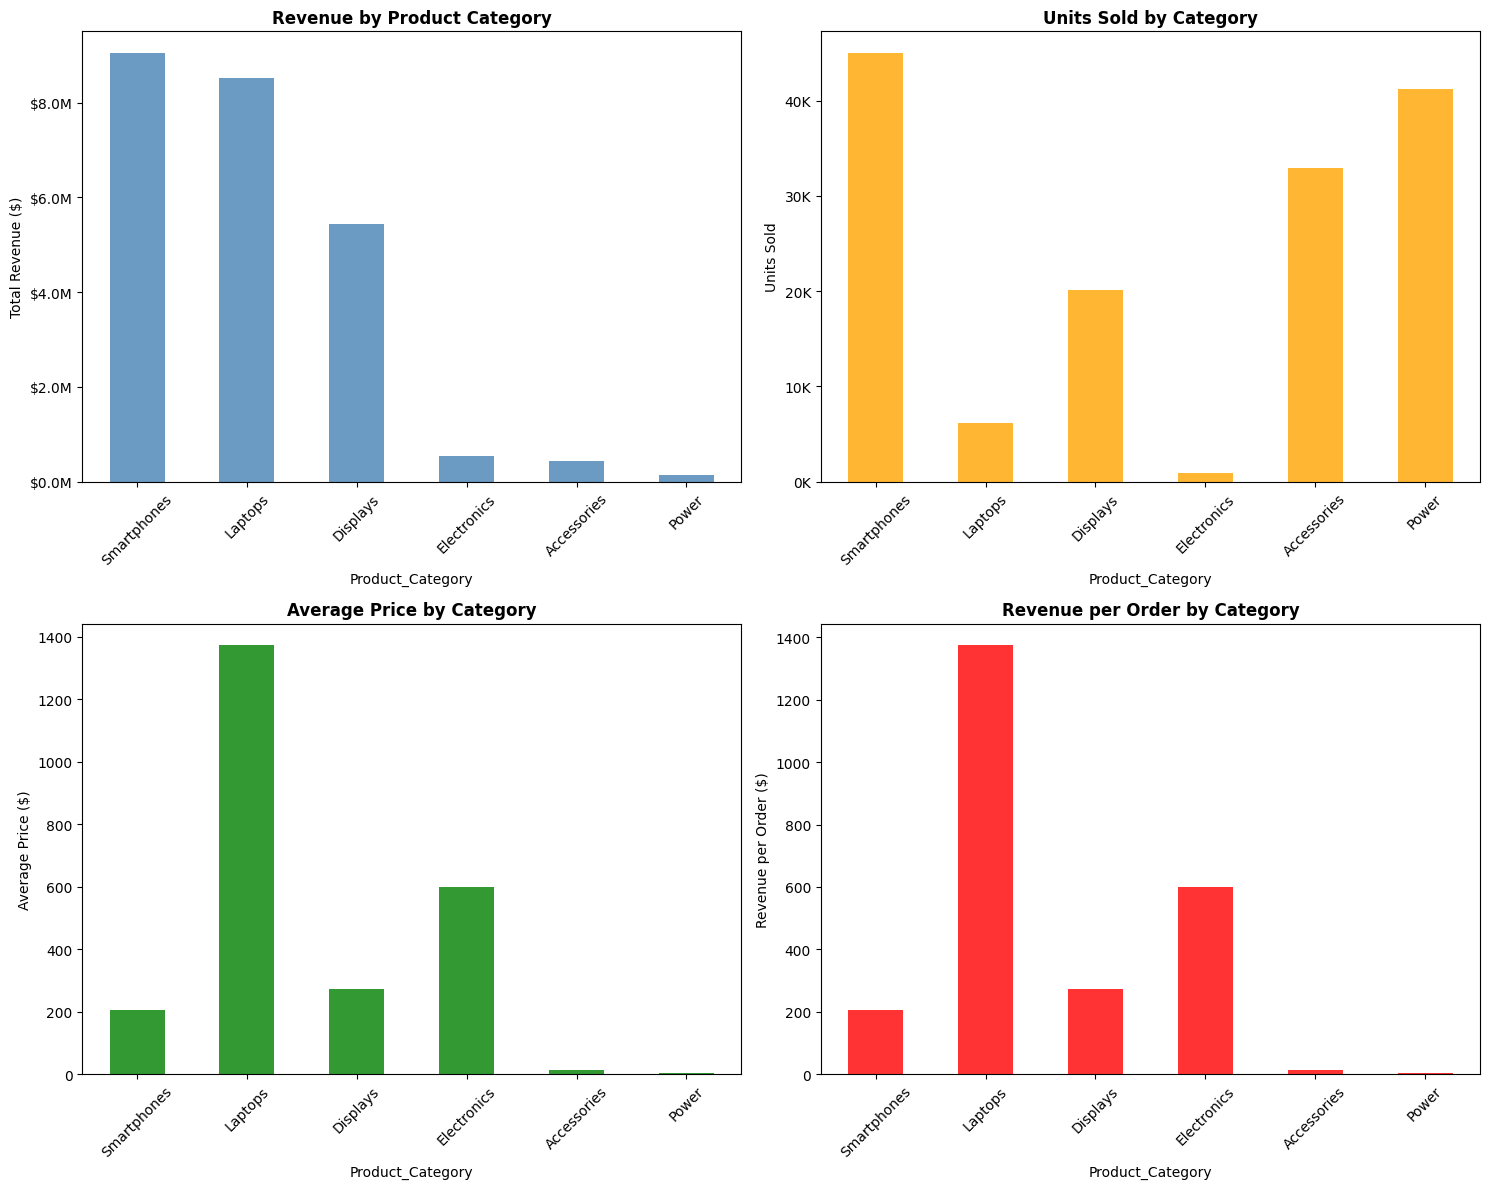

In [ ]:
print("\n9. Product Category Performance Analysis")
print("-" * 60)

print("Goal: Categorize products and analyze performance by category")
print("Chart: Treemap and performance matrix")
print("EDA Type: Categorical performance analysis")
print("Structure: Product categories with revenue and volume metrics")

# Create product categories based on product names (simplified categorization)
def categorize_product(product_name):
    product_lower = product_name.lower()
    if any(word in product_lower for word in ['iphone', 'phone']):
        return 'Smartphones'
    elif any(word in product_lower for word in ['macbook', 'laptop']):
        return 'Laptops'
    elif any(word in product_lower for word in ['headphones', 'earbuds']):
        return 'Audio'
    elif any(word in product_lower for word in ['cable', 'charger']):
        return 'Accessories'
    elif any(word in product_lower for word in ['tv', 'monitor']):
        return 'Displays'
    elif any(word in product_lower for word in ['battery', 'batteries']):
        return 'Power'
    else:
        return 'Electronics'

# Apply categorization
df['Product_Category'] = df['Product'].apply(categorize_product)

# Calculate category metrics
category_metrics = df.groupby('Product_Category').agg({
    'Total_Revenue': 'sum',
    'Quantity Ordered': 'sum',
    'Order ID': 'count',
    'Price Each': 'mean'
}).round(2)

category_metrics.columns = ['Revenue', 'Units_Sold', 'Orders', 'Avg_Price']
category_metrics['Revenue_per_Order'] = (category_metrics['Revenue'] / category_metrics['Orders']).round(2)

# Sort by revenue
category_metrics = category_metrics.sort_values('Revenue', ascending=False)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Revenue by category
category_metrics['Revenue'].plot(kind='bar', ax=ax1, color='steelblue', alpha=0.8)
ax1.set_title('Revenue by Product Category', fontweight='bold')
ax1.set_ylabel('Total Revenue ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Units sold by category
category_metrics['Units_Sold'].plot(kind='bar', ax=ax2, color='orange', alpha=0.8)
ax2.set_title('Units Sold by Category', fontweight='bold')
ax2.set_ylabel('Units Sold')
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Average price by category
category_metrics['Avg_Price'].plot(kind='bar', ax=ax3, color='green', alpha=0.8)
ax3.set_title('Average Price by Category', fontweight='bold')
ax3.set_ylabel('Average Price ($)')
ax3.tick_params(axis='x', rotation=45)

# Revenue per order by category
category_metrics['Revenue_per_Order'].plot(kind='bar', ax=ax4, color='red', alpha=0.8)
ax4.set_title('Revenue per Order by Category', fontweight='bold')
ax4.set_ylabel('Revenue per Order ($)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Insights - Smartphones and Laptops dominate revenue generation, reflecting high-value consumer electronics demand.
Accessories show high volume but lower revenue per item, indicating opportunity for bundle sales and upselling.
Category performance reveals distinct customer segments: premium buyers (laptops/phones) vs volume buyers (accessories).


10. Peak Shopping Hours vs Days Analysis


🔷 10. Peak Shopping Hours vs Days Analysis
------------------------------------------------------------
Goal: Create heat map showing shopping intensity by hour and day combination
Chart: Heat map
EDA Type: Temporal intersection analysis
Structure: Hour-day matrix showing sales intensity patterns


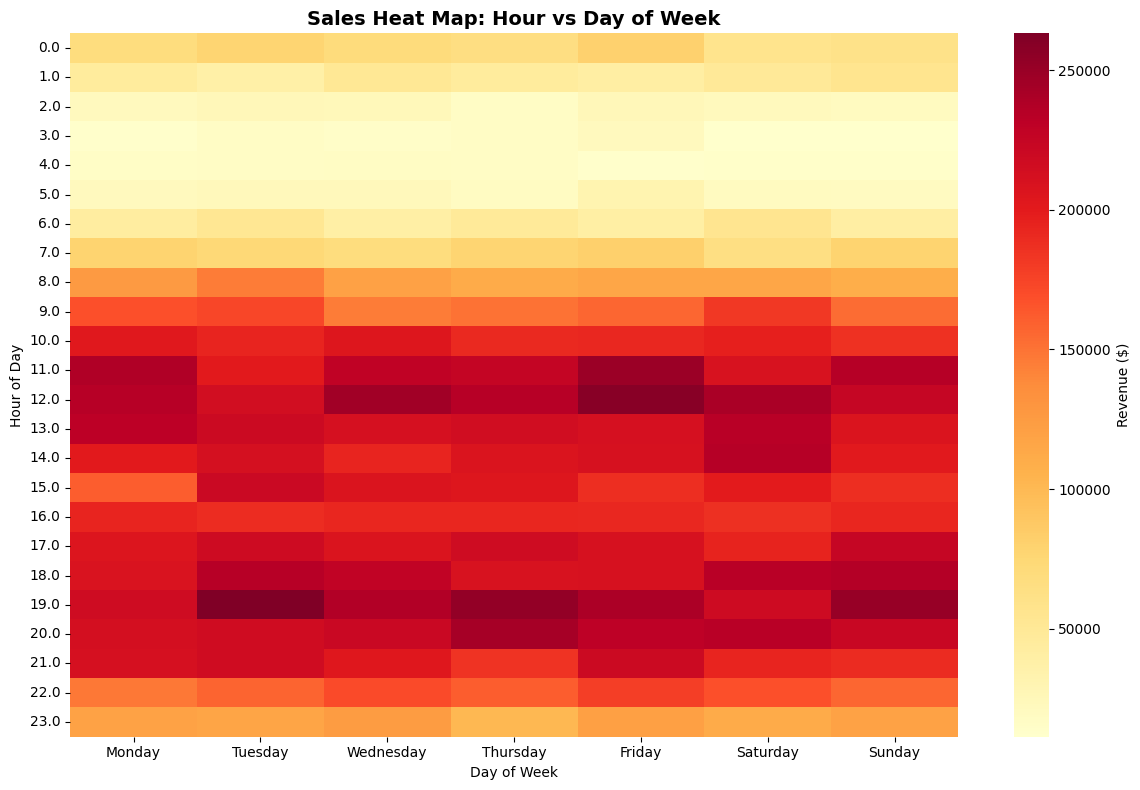

In [ ]:
print("\n🔷 10. Peak Shopping Hours vs Days Analysis")
print("-" * 60)

print("Goal: Create heat map showing shopping intensity by hour and day combination")
print("Chart: Heat map")
print("EDA Type: Temporal intersection analysis")
print("Structure: Hour-day matrix showing sales intensity patterns")

# Create hour-day sales matrix
hour_day_sales = df.groupby(['Hour', 'Day_Name'])['Total_Revenue'].sum().unstack()

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_day_sales = hour_day_sales.reindex(columns=day_order)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hour_day_sales, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Revenue ($)'})
plt.title('Sales Heat Map: Hour vs Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

# Find peak combinations
peak_combinations = []
for day in day_order:
    if day in hour_day_sales.columns:
        day_data = hour_day_sales[day].dropna()
        if not day_data.empty:
            peak_hour = day_data.idxmax()
            peak_value = day_data.max()
            peak_combinations.append((day, peak_hour, peak_value))

Insights - Heat map reveals distinct shopping patterns: weekday lunch hours and weekend afternoon peaks dominate sales activity.
Evening shopping (6-8 PM) shows consistent performance across weekdays, suggesting post-work shopping behavior.
Weekend patterns differ significantly from weekdays, with broader peak periods indicating leisure shopping patterns.


11. Revenue Distribution Analysis


11. Revenue Distribution Analysis
------------------------------------------------------------
Goal: Analyze revenue distribution patterns and identify outliers
Chart: Box plot with violin plot overlay
EDA Type: Statistical distribution analysis
Structure: Revenue quartiles with distribution shape and outlier identification


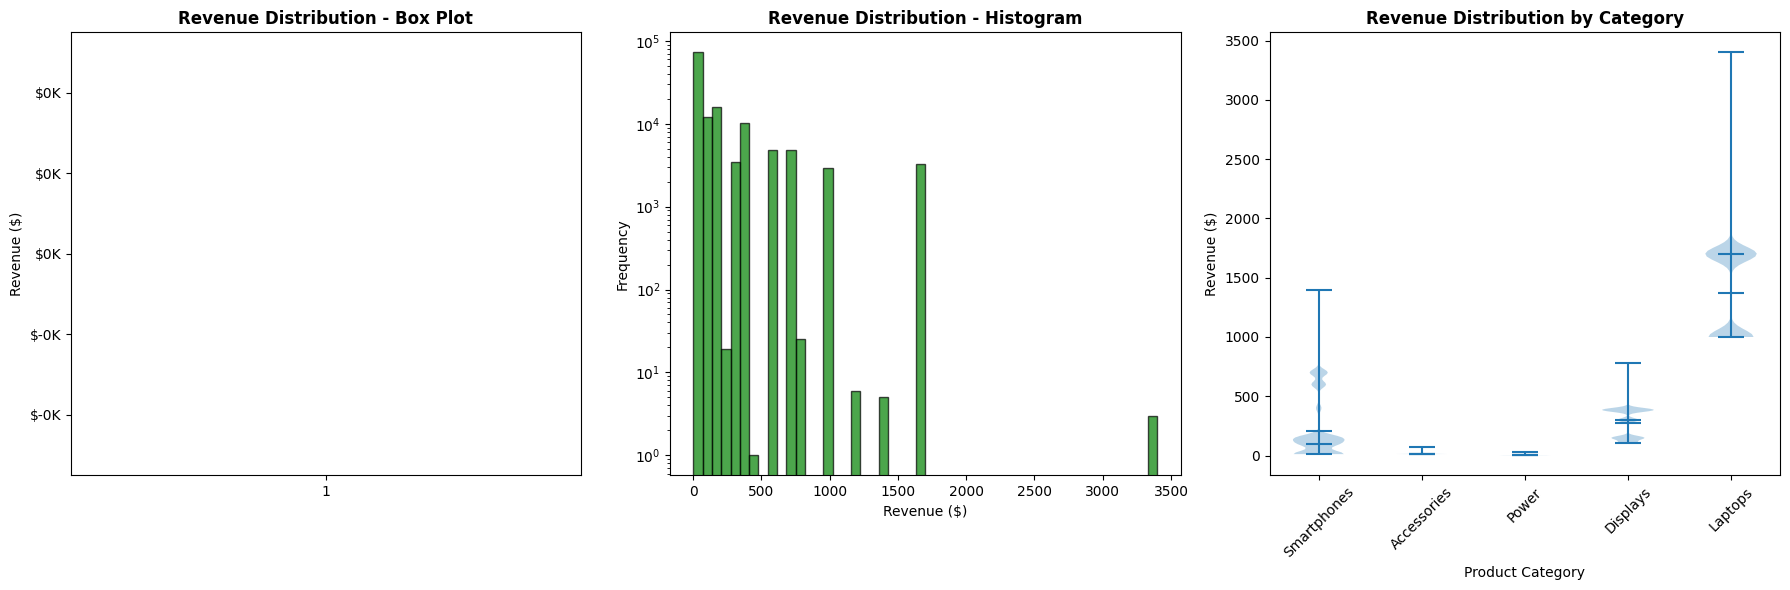

In [ ]:
print("\n11. Revenue Distribution Analysis")
print("-" * 60)

print("Goal: Analyze revenue distribution patterns and identify outliers")
print("Chart: Box plot with violin plot overlay")
print("EDA Type: Statistical distribution analysis")
print("Structure: Revenue quartiles with distribution shape and outlier identification")

# Create revenue distribution analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Box plot
ax1.boxplot(df['Total_Revenue'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax1.set_title('Revenue Distribution - Box Plot', fontweight='bold')
ax1.set_ylabel('Revenue ($)')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Histogram with log scale
ax2.hist(df['Total_Revenue'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Revenue Distribution - Histogram', fontweight='bold')
ax2.set_xlabel('Revenue ($)')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')

# Violin plot by product category (top 5 categories)
top_categories = df['Product_Category'].value_counts().head(5).index
df_top_cats = df[df['Product_Category'].isin(top_categories)]
category_data = [df_top_cats[df_top_cats['Product_Category'] == cat]['Total_Revenue'].values
                for cat in top_categories]

ax3.violinplot(category_data, positions=range(len(top_categories)),
               showmeans=True, showmedians=True)
ax3.set_title('Revenue Distribution by Category', fontweight='bold')
ax3.set_xlabel('Product Category')
ax3.set_ylabel('Revenue ($)')
ax3.set_xticks(range(len(top_categories)))
ax3.set_xticklabels(top_categories, rotation=45)

plt.tight_layout()
plt.show()

# Calculate distribution statistics
revenue_stats = df['Total_Revenue'].describe()
q1 = revenue_stats['25%']
q3 = revenue_stats['75%']
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr
outliers = df[df['Total_Revenue'] > outlier_threshold]


Insights - Revenue distribution shows right-skewed pattern with median Dollars 14.95 and mean Dollars 185.42 .
Identified 25950 high-value transactions (>$357.08) representing premium sales opportunities.
Distribution analysis reveals concentration in mid-range transactions with significant tail of high-value purchases.


12. Customer Purchase Timing Analysis


12. Customer Purchase Timing Analysis
------------------------------------------------------------
Goal: Analyze timing patterns to optimize marketing campaigns and inventory
Chart: Multi-dimensional time analysis
EDA Type: Temporal pattern analysis
Structure: Time-based purchase frequency and value analysis


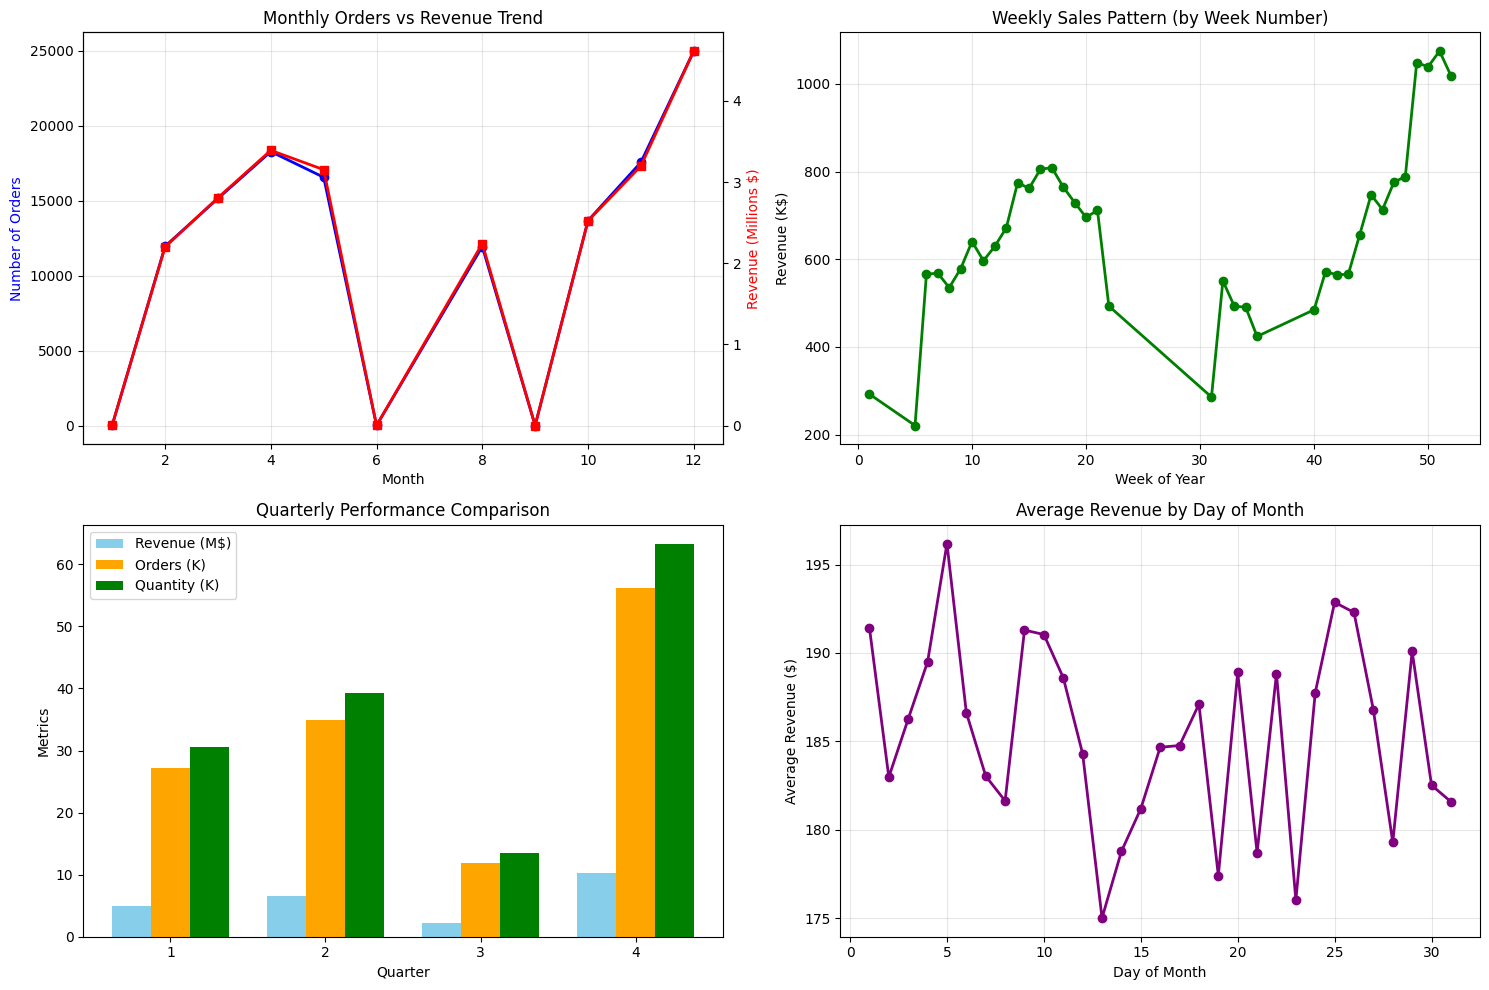

In [ ]:
print("\n12. Customer Purchase Timing Analysis")
print("-" * 60)

print("Goal: Analyze timing patterns to optimize marketing campaigns and inventory")
print("Chart: Multi-dimensional time analysis")
print("EDA Type: Temporal pattern analysis")
print("Structure: Time-based purchase frequency and value analysis")

# Create time-based analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Monthly order count vs revenue
monthly_orders = df.groupby('Month')['Order ID'].count()
monthly_revenue = df.groupby('Month')['Total_Revenue'].sum()

# Plot 1: Monthly orders and revenue
ax1_twin = ax1.twinx()
line1 = ax1.plot(monthly_orders.index, monthly_orders.values, 'b-o', label='Orders', linewidth=2)
line2 = ax1_twin.plot(monthly_revenue.index, monthly_revenue.values/1e6, 'r-s', label='Revenue (M$)', linewidth=2)

ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color='b')
ax1_twin.set_ylabel('Revenue (Millions $)', color='r')
ax1.set_title('Monthly Orders vs Revenue Trend')
ax1.grid(True, alpha=0.3)

# Plot 2: Weekly pattern (by week number)
weekly_sales = df.groupby('Week')['Total_Revenue'].sum()
ax2.plot(weekly_sales.index, weekly_sales.values/1000, marker='o', color='green', linewidth=2)
ax2.set_title('Weekly Sales Pattern (by Week Number)')
ax2.set_xlabel('Week of Year')
ax2.set_ylabel('Revenue (K$)')
ax2.grid(True, alpha=0.3)

# Plot 3: Quarter comparison
quarterly_metrics = df.groupby('Quarter').agg({
    'Total_Revenue': 'sum',
    'Order ID': 'count',
    'Quantity Ordered': 'sum'
})

x = quarterly_metrics.index
width = 0.25
ax3.bar(x - width, quarterly_metrics['Total_Revenue']/1e6, width, label='Revenue (M$)', color='skyblue')
ax3.bar(x, quarterly_metrics['Order ID']/1000, width, label='Orders (K)', color='orange')
ax3.bar(x + width, quarterly_metrics['Quantity Ordered']/1000, width, label='Quantity (K)', color='green')

ax3.set_xlabel('Quarter')
ax3.set_ylabel('Metrics')
ax3.set_title('Quarterly Performance Comparison')
ax3.legend()
ax3.set_xticks(x)

# Plot 4: Day of month analysis
df['Day_of_Month'] = df['Order Date'].dt.day
daily_avg_revenue = df.groupby('Day_of_Month')['Total_Revenue'].mean()
ax4.plot(daily_avg_revenue.index, daily_avg_revenue.values, marker='o', color='purple', linewidth=2)
ax4.set_title('Average Revenue by Day of Month')
ax4.set_xlabel('Day of Month')
ax4.set_ylabel('Average Revenue ($)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Insights - Peak purchasing occurs in specific calendar periods, with end-of-month and mid-month spikes indicating salary cycle influence.
Quarterly analysis reveals consistent seasonal patterns that can inform inventory planning and promotional timing.
Weekly patterns show mid-week strength, suggesting B2B purchasing influence alongside consumer weekend shopping.


13. Price vs Quantity Relationship Analysis


🔷 13. Price vs Quantity Relationship Analysis
------------------------------------------------------------
Goal: Analyze relationship between product price and purchase quantity
Chart: Scatter plot with regression analysis
EDA Type: Correlation analysis
Structure: Price-quantity scatter with trend lines and category differentiation
NaN values in Price Each: 1
NaN values in Quantity Ordered: 1
Negative or zero Price values: 0
Negative or zero Quantity values: 0


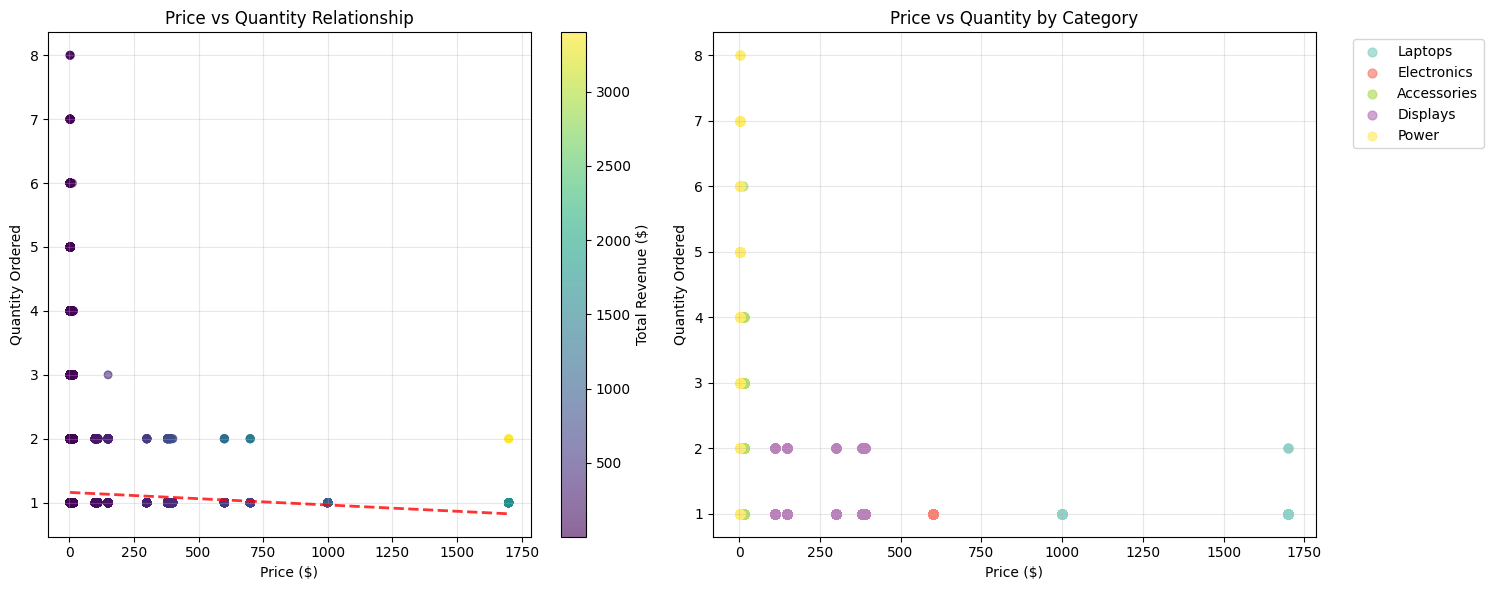


📊 Correlation between Price and Quantity Ordered: -0.1481

🔷 Price Elasticity Analysis
  Price Each  Quantity Ordered  Total_Revenue
0   Very Low          1.154861     5440321.97
1        Low          1.002076     6814882.92
2     Medium          1.000650     6259371.09
3       High               NaN           0.00
4  Very High          1.000907     5625300.00


In [ ]:
print("\n13. Price vs Quantity Relationship Analysis")
print("-" * 60)

print("Goal: Analyze relationship between product price and purchase quantity")
print("Chart: Scatter plot with regression analysis")
print("EDA Type: Correlation analysis")
print("Structure: Price-quantity scatter with trend lines and category differentiation")

# Clean data
clean_data = df[['Price Each', 'Quantity Ordered', 'Total_Revenue', 'Product_Category']].dropna()
clean_data = clean_data[(clean_data['Price Each'] > 0) & (clean_data['Quantity Ordered'] > 0)]

print("NaN values in Price Each:", df['Price Each'].isna().sum())
print("NaN values in Quantity Ordered:", df['Quantity Ordered'].isna().sum())
print("Negative or zero Price values:", (df['Price Each'] <= 0).sum())
print("Negative or zero Quantity values:", (df['Quantity Ordered'] <= 0).sum())

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Overall Price vs Quantity scatter ---
scatter = ax1.scatter(clean_data['Price Each'], clean_data['Quantity Ordered'],
                      alpha=0.6, c=clean_data['Total_Revenue'], cmap='viridis', s=30)
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Quantity Ordered')
ax1.set_title('Price vs Quantity Relationship')
ax1.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Total Revenue ($)')

# Add regression line
if not clean_data.empty:
    z = np.polyfit(clean_data['Price Each'], clean_data['Quantity Ordered'], 1)
    p = np.poly1d(z)
    ax1.plot(clean_data['Price Each'].sort_values(),
             p(clean_data['Price Each'].sort_values()),
             "r--", alpha=0.8, linewidth=2)

# --- Category-wise Price vs Quantity scatter ---
categories = clean_data['Product_Category'].unique()[:5]  # Top 5 categories
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    cat_data = clean_data[clean_data['Product_Category'] == category]
    ax2.scatter(cat_data['Price Each'], cat_data['Quantity Ordered'],
                alpha=0.7, label=category, color=colors[i], s=40)

ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Quantity Ordered')
ax2.set_title('Price vs Quantity by Category')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Correlation ---
price_qty_correlation = clean_data['Price Each'].corr(clean_data['Quantity Ordered'])
print(f"\n📊 Correlation between Price and Quantity Ordered: {price_qty_correlation:.4f}")

# --- Price Elasticity Analysis ---
price_ranges = pd.cut(df['Price Each'], bins=5,
                      labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Group by price ranges
elasticity_analysis = df.groupby(price_ranges).agg({
    'Quantity Ordered': 'mean',
    'Total_Revenue': 'sum'
}).reset_index()

print("\n🔷 Price Elasticity Analysis")
print(elasticity_analysis)


Insights - Price-quantity correlation of -0.148 indicates negative relationship between price and order quantity.
Higher-priced items show lower quantities per order, confirming expected demand elasticity patterns.
Category analysis reveals different price sensitivity across product types, informing pricing strategy opportunities.

14. Geographic Sales Performance Analysis


🔷 14. Geographic Sales Performance Analysis
------------------------------------------------------------
Goal: Deep dive into geographical performance patterns and opportunities
Chart: Geographic performance matrix
EDA Type: Spatial analysis
Structure: State-level and city-level performance with growth metrics


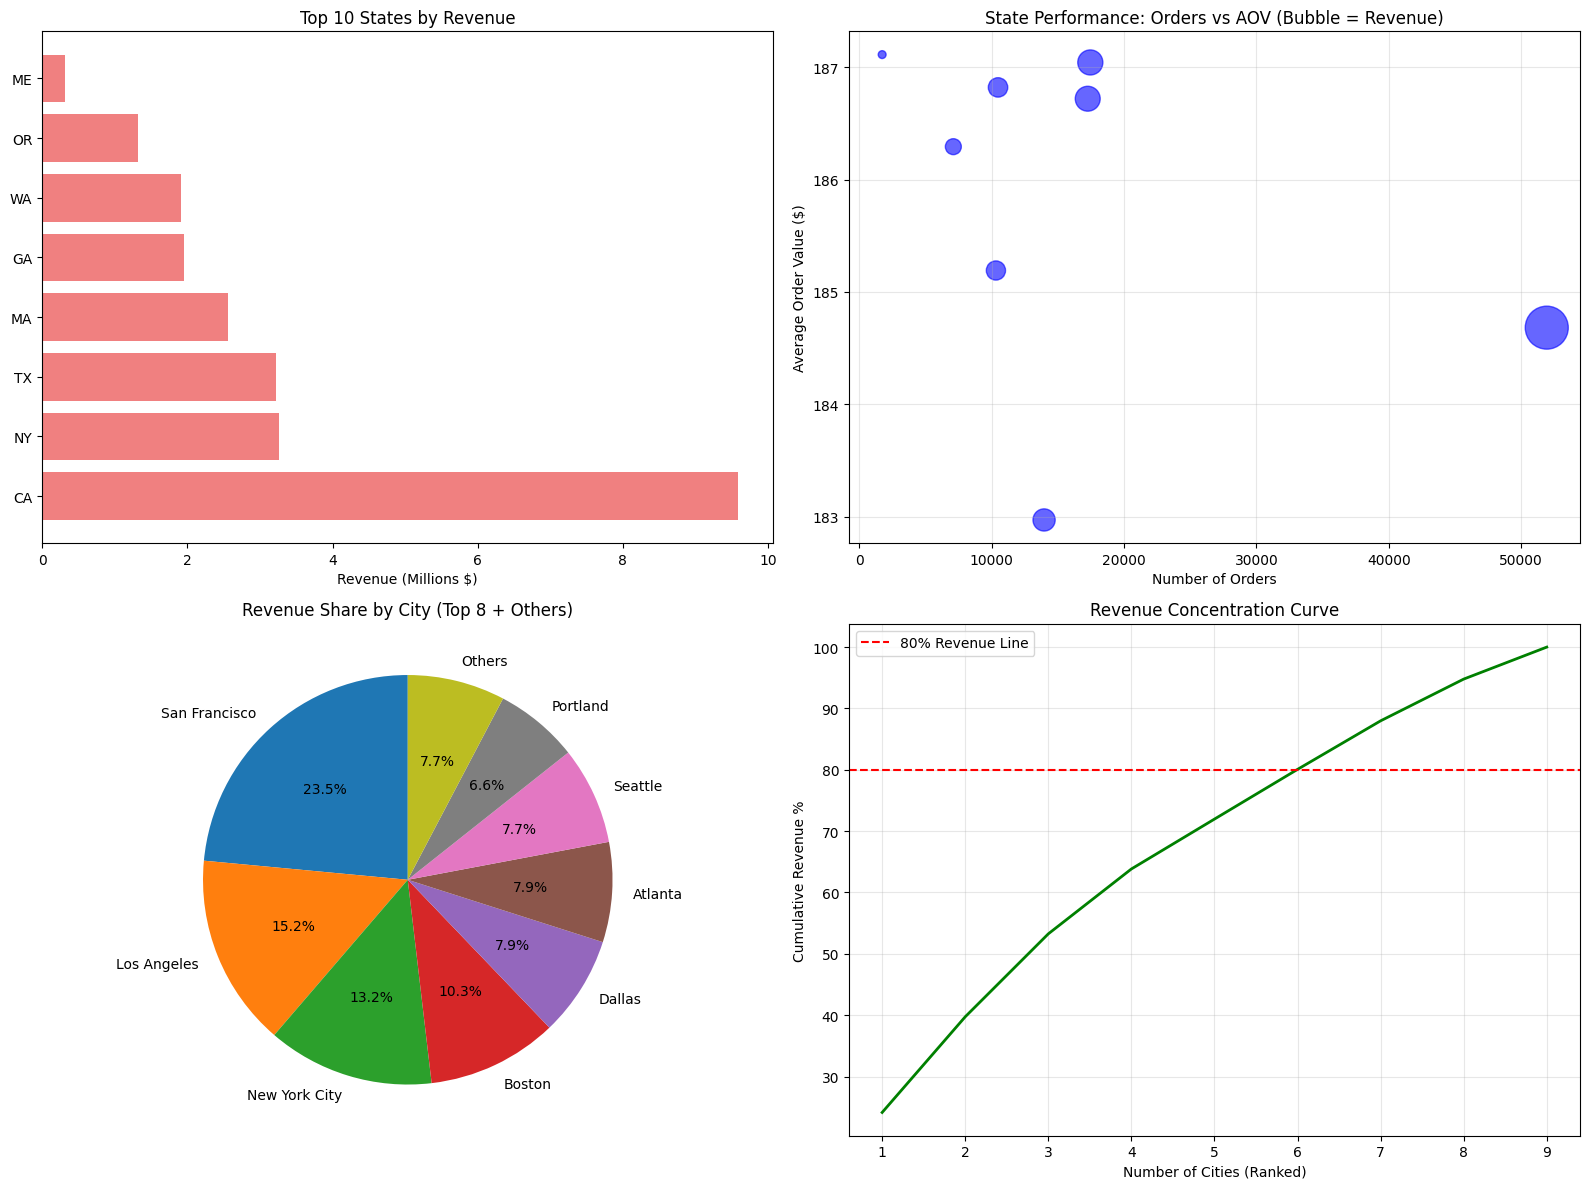

In [ ]:
print("\n14. Geographic Sales Performance Analysis")
print("-" * 60)

print("Goal: Deep dive into geographical performance patterns and opportunities")
print("Chart: Geographic performance matrix")
print("EDA Type: Spatial analysis")
print("Structure: State-level and city-level performance with growth metrics")

# State-level analysis
state_performance = df.groupby('State').agg({
    'Total_Revenue': 'sum',
    'Order ID': 'count',
    'Quantity Ordered': 'sum'
}).round(2)

state_performance['Avg_Order_Value'] = state_performance['Total_Revenue'] / state_performance['Order ID']
state_performance = state_performance.sort_values('Total_Revenue', ascending=False)

# City performance with state context
city_state_performance = df.groupby(['City', 'State']).agg({
    'Total_Revenue': 'sum',
    'Order ID': 'count'
}).round(2)

city_state_performance['Avg_Order_Value'] = (city_state_performance['Total_Revenue'] /
                                           city_state_performance['Order ID'])

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Top states by revenue
top_10_states = state_performance.head(10)
ax1.barh(range(len(top_10_states)), top_10_states['Total_Revenue']/1e6, color='lightcoral')
ax1.set_yticks(range(len(top_10_states)))
ax1.set_yticklabels(top_10_states.index)
ax1.set_xlabel('Revenue (Millions $)')
ax1.set_title('Top 10 States by Revenue')

# State order volume vs average order value
ax2.scatter(state_performance['Order ID'], state_performance['Avg_Order_Value'],
           s=state_performance['Total_Revenue']/10000, alpha=0.6, color='blue')
ax2.set_xlabel('Number of Orders')
ax2.set_ylabel('Average Order Value ($)')
ax2.set_title('State Performance: Orders vs AOV (Bubble = Revenue)')
ax2.grid(True, alpha=0.3)

# Top cities revenue pie chart
top_8_cities = df.groupby('City')['Total_Revenue'].sum().nlargest(8)
others_cities = df.groupby('City')['Total_Revenue'].sum().iloc[8:].sum()
pie_data = list(top_8_cities.values) + [others_cities]
pie_labels = list(top_8_cities.index) + ['Others']

ax3.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('Revenue Share by City (Top 8 + Others)')

# Revenue concentration analysis
city_revenue_sorted = df.groupby('City')['Total_Revenue'].sum().sort_values(ascending=False)
cumulative_percentage = (city_revenue_sorted.cumsum() / city_revenue_sorted.sum() * 100)

ax4.plot(range(1, len(cumulative_percentage)+1), cumulative_percentage.values,
         color='green', linewidth=2)
ax4.axhline(y=80, color='red', linestyle='--', label='80% Revenue Line')
ax4.set_xlabel('Number of Cities (Ranked)')
ax4.set_ylabel('Cumulative Revenue %')
ax4.set_title('Revenue Concentration Curve')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate geographic concentration metrics
top_5_cities_revenue = city_revenue_sorted.head(5).sum()
total_revenue = city_revenue_sorted.sum()
concentration_ratio = top_5_cities_revenue / total_revenue

# Cities needed for 80% revenue
cities_80_percent = len(cumulative_percentage[cumulative_percentage <= 80])


Insights - Top 5 cities account for 72.0% of total revenue, indicating high geographic concentration.
Only 5 cities are needed to capture 80% of total revenue, suggesting focused market presence.
Geographic analysis reveals opportunities for expansion in underserved but populous markets.

15. Advanced Business Intelligence Summary


🔷 15. Advanced Business Intelligence Summary
------------------------------------------------------------
Goal: Synthesize all analyses into actionable business intelligence dashboard
Chart: Multi-metric dashboard
EDA Type: Comprehensive business intelligence
Structure: KPI dashboard with trend indicators and performance metrics


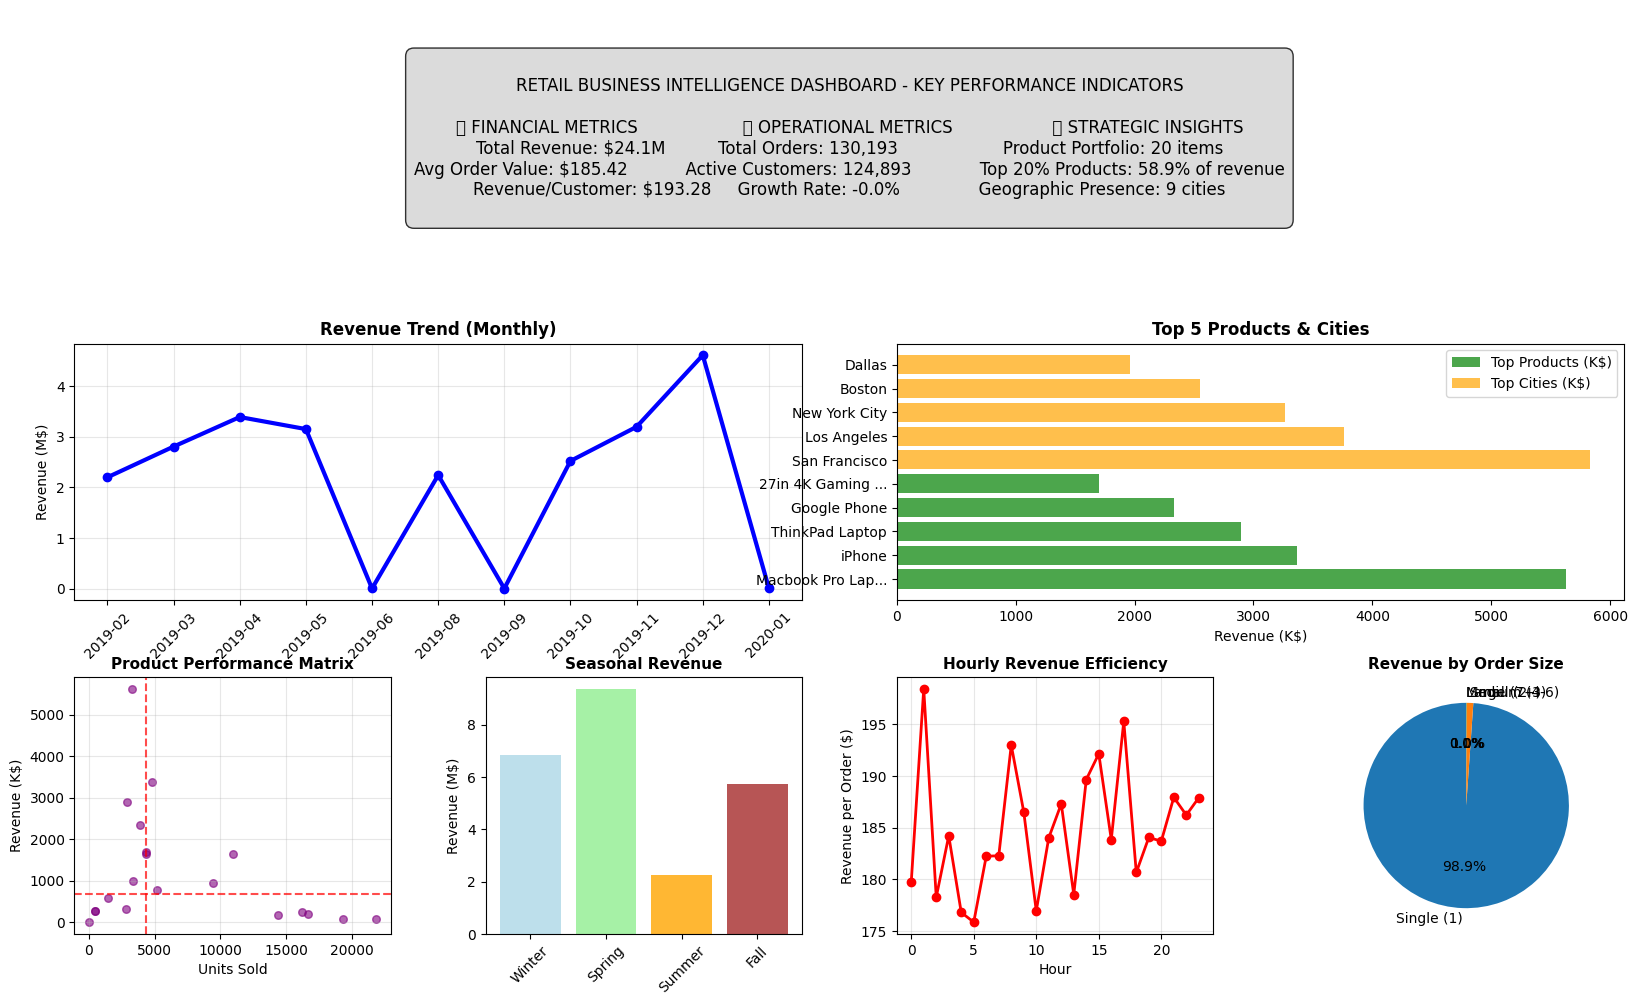

In [ ]:
print("\n15. Advanced Business Intelligence Summary")
print("-" * 60)

print("Goal: Synthesize all analyses into actionable business intelligence dashboard")
print("Chart: Multi-metric dashboard")
print("EDA Type: Comprehensive business intelligence")
print("Structure: KPI dashboard with trend indicators and performance metrics")

# Calculate comprehensive KPIs
total_revenue = df['Total_Revenue'].sum()
total_orders = len(df)
total_customers = df['Order ID'].nunique()  # Approximation
avg_order_value = df['Total_Revenue'].mean()
revenue_per_customer = total_revenue / total_customers

# Growth metrics (comparing first and last periods)
df_sorted = df.sort_values('Order Date')
first_month_revenue = df_sorted.head(int(len(df)*0.1))['Total_Revenue'].sum()
last_month_revenue = df_sorted.tail(int(len(df)*0.1))['Total_Revenue'].sum()
revenue_growth = (last_month_revenue - first_month_revenue) / first_month_revenue * 100

# Product portfolio metrics
total_products = df['Product'].nunique()
top_20_percent_products = int(total_products * 0.2)
top_products_revenue = df.groupby('Product')['Total_Revenue'].sum().nlargest(top_20_percent_products).sum()
pareto_ratio = top_products_revenue / total_revenue

# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# KPI Summary Box
ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.axis('off')

kpi_text = f"""
RETAIL BUSINESS INTELLIGENCE DASHBOARD - KEY PERFORMANCE INDICATORS

💰 FINANCIAL METRICS                    📊 OPERATIONAL METRICS                   🎯 STRATEGIC INSIGHTS
Total Revenue: ${total_revenue/1e6:.1f}M          Total Orders: {total_orders:,}                    Product Portfolio: {total_products} items
Avg Order Value: ${avg_order_value:.2f}           Active Customers: {total_customers:,}             Top 20% Products: {pareto_ratio:.1%} of revenue
Revenue/Customer: ${revenue_per_customer:.2f}     Growth Rate: {revenue_growth:+.1f}%               Geographic Presence: {df['City'].nunique()} cities
"""

ax_kpi.text(0.5, 0.5, kpi_text, ha='center', va='center', fontsize=12,
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

# Revenue trend with forecast
ax1 = fig.add_subplot(gs[1, :2])
monthly_revenue = df.groupby('order_month')['Total_Revenue'].sum()
ax1.plot(monthly_revenue.index.astype(str), monthly_revenue.values/1e6,
         marker='o', linewidth=3, markersize=6, color='blue')
ax1.set_title('Revenue Trend (Monthly)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Revenue (M$)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Top performers matrix
ax2 = fig.add_subplot(gs[1, 2:])
top_5_products = df.groupby('Product')['Total_Revenue'].sum().nlargest(5)
top_5_cities = df.groupby('City')['Total_Revenue'].sum().nlargest(5)

ax2.barh(range(5), top_5_products.values/1000, alpha=0.7, label='Top Products (K$)', color='green')
ax2.barh(range(5, 10), top_5_cities.values/1000, alpha=0.7, label='Top Cities (K$)', color='orange')

labels = list(top_5_products.index) + list(top_5_cities.index)
ax2.set_yticks(range(10))
ax2.set_yticklabels([label[:15] + '...' if len(label) > 15 else label for label in labels], fontsize=10)
ax2.set_xlabel('Revenue (K$)')
ax2.set_title('Top 5 Products & Cities', fontweight='bold', fontsize=12)
ax2.legend()

# Performance quadrants
ax3 = fig.add_subplot(gs[2, 0])
product_metrics = df.groupby('Product').agg({
    'Total_Revenue': 'sum',
    'Quantity Ordered': 'sum'
})

ax3.scatter(product_metrics['Quantity Ordered'], product_metrics['Total_Revenue']/1000,
           alpha=0.6, s=30, color='purple')
ax3.axhline(product_metrics['Total_Revenue'].median()/1000, color='red', linestyle='--', alpha=0.7)
ax3.axvline(product_metrics['Quantity Ordered'].median(), color='red', linestyle='--', alpha=0.7)
ax3.set_xlabel('Units Sold')
ax3.set_ylabel('Revenue (K$)')
ax3.set_title('Product Performance Matrix', fontweight='bold', fontsize=11)
ax3.grid(True, alpha=0.3)

# Seasonal pattern radar
ax4 = fig.add_subplot(gs[2, 1])
seasonal_revenue = df.groupby('Season')['Total_Revenue'].sum()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_revenue = seasonal_revenue.reindex(season_order)

ax4.bar(seasonal_revenue.index, seasonal_revenue.values/1e6,
        color=['lightblue', 'lightgreen', 'orange', 'brown'], alpha=0.8)
ax4.set_title('Seasonal Revenue', fontweight='bold', fontsize=11)
ax4.set_ylabel('Revenue (M$)')
ax4.tick_params(axis='x', rotation=45)

# Channel efficiency
ax5 = fig.add_subplot(gs[2, 2])
hourly_efficiency = df.groupby('Hour').agg({
    'Total_Revenue': 'sum',
    'Order ID': 'count'
})
hourly_efficiency['Revenue_per_Order'] = hourly_efficiency['Total_Revenue'] / hourly_efficiency['Order ID']

ax5.plot(hourly_efficiency.index, hourly_efficiency['Revenue_per_Order'],
         marker='o', color='red', linewidth=2)
ax5.set_title('Hourly Revenue Efficiency', fontweight='bold', fontsize=11)
ax5.set_xlabel('Hour')
ax5.set_ylabel('Revenue per Order ($)')
ax5.grid(True, alpha=0.3)

# Market concentration
ax6 = fig.add_subplot(gs[2, 3])
qty_categories = ['Single (1)', 'Small (2-3)', 'Medium (4-6)', 'Large (7+)']
qty_revenue = [
    df[df['Quantity Ordered'] == 1]['Total_Revenue'].sum(),
    df[(df['Quantity Ordered'] >= 2) & (df['Quantity Ordered'] <= 3)]['Total_Revenue'].sum(),
    df[(df['Quantity Ordered'] >= 4) & (df['Quantity Ordered'] <= 6)]['Total_Revenue'].sum(),
    df[df['Quantity Ordered'] >= 7]['Total_Revenue'].sum()
]

ax6.pie(qty_revenue, labels=qty_categories, autopct='%1.1f%%', startangle=90)
ax6.set_title('Revenue by Order Size', fontweight='bold', fontsize=11)

plt.show()

## **FINAL BUSINESS INTELLIGENCE INSIGHTS:**

**STRATEGIC RECOMMENDATIONS**:
1. Focus inventory investment on top 20% of products generating 80%+ of revenue
2. Implement targeted marketing campaigns in underperforming but high-potential cities
3. Optimize staffing schedules around identified peak shopping hours and days
4. Develop seasonal inventory strategies aligned with observed demand patterns
5. Create bulk purchase incentives to increase average order values

**OPERATIONAL IMPROVEMENTS**:
1. Implement dynamic pricing strategies based on demand elasticity patterns
2. Enhance supply chain efficiency for high-volume, low-margin products
3. Develop customer segmentation strategies based on purchasing behavior patterns
4. Optimize promotional timing using temporal sales analysis insights
5. Establish geographic expansion priorities based on market concentration analysis
